In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Imdb dataset
imdb_title_basics = pd.read_csv('data/title.basics.csv')
imdb_title_akas = pd.read_csv('data/title.akas.csv')
imdb_title_crew = pd.read_csv('data/title.crew.csv')
imdb_title_principals = pd.read_csv('data/title.principals.csv')
imdb_name_basics = pd.read_csv('data/name.basics.csv')
imdb_title_ratings = pd.read_csv('data/title.ratings.csv')
#Rotten tomato dataset
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter="\t")
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter="\t", encoding='latin-1')
#Box office Mojo dataset
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
#The movies DB dataset
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
# The numbers dataset
tn_movies_budgets = pd.read_csv('data/tn.movie_budgets.csv')

In [3]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
imdb_title_basics['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1085, dtype: int64

In [5]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
tn_movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## In order to make calculations we need to remove $ and , from our numeric values

In [7]:
tn_movies_budgets_comma_fixed = tn_movies_budgets.copy()
tn_movies_budgets_comma_fixed['production_budget'] = tn_movies_budgets_comma_fixed['production_budget'].str.replace('$','')
tn_movies_budgets_comma_fixed['production_budget'] = tn_movies_budgets_comma_fixed['production_budget'].str.replace(',','').astype(int)
tn_movies_budgets_comma_fixed['domestic_gross'] = tn_movies_budgets_comma_fixed['domestic_gross'].str.replace('$','')
tn_movies_budgets_comma_fixed['domestic_gross'] = tn_movies_budgets_comma_fixed['domestic_gross'].str.replace(',','').astype(int)
tn_movies_budgets_comma_fixed['worldwide_gross'] = tn_movies_budgets_comma_fixed['worldwide_gross'].str.replace('$','')
tn_movies_budgets_comma_fixed['worldwide_gross'] = tn_movies_budgets_comma_fixed['worldwide_gross'].str.replace(',','').astype(float)


/var/folders/6m/fl6mfqzj5wb0xc51g7g3k2700000gn/T/ipykernel_1408/258809931.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies_budgets_comma_fixed['production_budget'] = tn_movies_budgets_comma_fixed['production_budget'].str.replace('$','')
/var/folders/6m/fl6mfqzj5wb0xc51g7g3k2700000gn/T/ipykernel_1408/258809931.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies_budgets_comma_fixed['domestic_gross'] = tn_movies_budgets_comma_fixed['domestic_gross'].str.replace('$','')
/var/folders/6m/fl6mfqzj5wb0xc51g7g3k2700000gn/T/ipykernel_1408/258809931.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, sin

In [8]:
tn_movies_budgets_comma_fixed.sort_values('worldwide_gross', ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09
...,...,...,...,...,...,...
5474,75,"Dec 31, 2005",Insomnia Manica,500000,0,0.000000e+00
5473,74,"Jul 17, 2012",Girls Gone Dead,500000,0,0.000000e+00
5472,73,"Apr 3, 2012",Enter Nowhere,500000,0,0.000000e+00
5471,72,"Dec 31, 2010",Drones,500000,0,0.000000e+00


## Calculated profit margin percent to see how successful each movie is

In [9]:
tn_movies_budgets_comma_fixed['profit_margin_percent'] = ((tn_movies_budgets_comma_fixed['worldwide_gross']/tn_movies_budgets_comma_fixed['production_budget']) -1)*100

In [10]:
tn_movies_budgets_comma_fixed

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,315.369636
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,-100.000000
5778,79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,-73.240000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0.000000e+00,-100.000000


In [11]:
tn_movies_budgets_comma_fixed['year'] = tn_movies_budgets_comma_fixed['release_date'].apply(lambda x: x[-4:])
tn_movies_budgets_comma_fixed

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,553.257713,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,315.369636,2017
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,-100.000000,2018
5778,79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,3908.250000,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,-73.240000,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0.000000e+00,-100.000000,2015


In [12]:
tn_movies_budgets_comma_fixed['name_year'] = tn_movies_budgets_comma_fixed['movie'] + ' ' + tn_movies_budgets_comma_fixed['year']

In [13]:
tn_movies_budgets_comma_fixed.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,name_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,553.257713,2009,Avatar 2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,315.369636,2017,Star Wars Ep. VIII: The Last Jedi 2017


In [14]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
imdb_title_basics['name_year'] = imdb_title_basics['primary_title'] + ' ' + imdb_title_basics['start_year'].astype(str)

In [16]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,name_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh 2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season 2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind 2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh 2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera 2017


In [17]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   name_year        146144 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ MB


## Set the name_year as indev on both files to merge them on the index.
## We are merging to see the relation btw genres and profit margin percent

In [18]:
imdb_title_basics = imdb_title_basics.set_index('name_year')

In [19]:
tn_movies_budgets_comma_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5782 non-null   int64  
 1   release_date           5782 non-null   object 
 2   movie                  5782 non-null   object 
 3   production_budget      5782 non-null   int64  
 4   domestic_gross         5782 non-null   int64  
 5   worldwide_gross        5782 non-null   float64
 6   profit_margin_percent  5782 non-null   float64
 7   year                   5782 non-null   object 
 8   name_year              5782 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 406.7+ KB


In [20]:
tn_movies_budgets_comma_fixed = tn_movies_budgets_comma_fixed.set_index('name_year')

In [21]:
tn_movies_budgets_comma_fixed

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year
name_year,,,,,,,,
Avatar 2009,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,553.257713,2009
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019
Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015
Star Wars Ep. VIII: The Last Jedi 2017,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,315.369636,2017
...,...,...,...,...,...,...,...,...
Red 11 2018,78,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,-100.000000,2018
Following 1999,79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,3908.250000,1999
Return to the Land of Wonders 2005,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,-73.240000,2005


In [22]:
genre_analysis = tn_movies_budgets_comma_fixed.merge(imdb_title_basics, right_on = 'name_year', left_on = 'name_year')

In [23]:
genre_analysis.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
name_year,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War 2018,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,582.711400,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
Justice League 2017,9,"Nov 17, 2017",Justice League,300000000,229024295,6.559452e+08,118.648403,2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"


In [24]:
genre_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1547 entries, Pirates of the Caribbean: On Stranger Tides 2011 to Stories of Our Lives 2014
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1547 non-null   int64  
 1   release_date           1547 non-null   object 
 2   movie                  1547 non-null   object 
 3   production_budget      1547 non-null   int64  
 4   domestic_gross         1547 non-null   int64  
 5   worldwide_gross        1547 non-null   float64
 6   profit_margin_percent  1547 non-null   float64
 7   year                   1547 non-null   object 
 8   tconst                 1547 non-null   object 
 9   primary_title          1547 non-null   object 
 10  original_title         1547 non-null   object 
 11  start_year             1547 non-null   int64  
 12  runtime_minutes        1521 non-null   float64
 13  genres                 1541 non-null   object

In [25]:
genre_analysis['genres'] = genre_analysis['genres'].map(lambda x: str(x).split(','))

In [26]:
genre_analysis.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
name_year,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"[Action, Adventure, Fantasy]"
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"[Action, Adventure, Sci-Fi]"
Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"[Action, Adventure, Sci-Fi]"
Avengers: Infinity War 2018,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,582.711400,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]"
Justice League 2017,9,"Nov 17, 2017",Justice League,300000000,229024295,6.559452e+08,118.648403,2017,tt0974015,Justice League,Justice League,2017,120.0,"[Action, Adventure, Fantasy]"


## We use explode to create new lines for movies more than one genre

In [27]:
genre_analysis_genre = genre_analysis.explode('genres')

## Music and Musical genres seem to be the same

In [28]:
genre_analysis_genre['genres'] = genre_analysis_genre['genres'].map(lambda x: 'Musical' if x == 'Music' else x)
genre_analysis_genre['genres']

name_year
Pirates of the Caribbean: On Stranger Tides 2011       Action
Pirates of the Caribbean: On Stranger Tides 2011    Adventure
Pirates of the Caribbean: On Stranger Tides 2011      Fantasy
Dark Phoenix 2019                                      Action
Dark Phoenix 2019                                   Adventure
                                                      ...    
Dutch Kills 2015                                     Thriller
The Ridges 2011                                         Drama
The Ridges 2011                                        Horror
The Ridges 2011                                      Thriller
Stories of Our Lives 2014                               Drama
Name: genres, Length: 3887, dtype: object

In [29]:
genre_analysis_genre['production_budget_m'] = genre_analysis_genre['production_budget'].map(lambda x: x/1000000)
genre_analysis_genre['domestic_gross_m'] = genre_analysis_genre['domestic_gross'].map(lambda x: x/1000000)
genre_analysis_genre['worldwide_gross_m'] = genre_analysis_genre['worldwide_gross'].map(lambda x: x/1000000)

In [30]:
genre_analysis_genre.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,production_budget_m,domestic_gross_m,worldwide_gross_m
name_year,,,,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Action,410.6,241.063875,1045.663875
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Adventure,410.6,241.063875,1045.663875
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Fantasy,410.6,241.063875,1045.663875
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Action,350.0,42.762350,149.762350
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Adventure,350.0,42.762350,149.762350


## Most successfull movies based on profitability

In [31]:
a = genre_analysis_genre.groupby('genres')['worldwide_gross'].sum().sort_values(ascending = False)
b = genre_analysis_genre.groupby('genres')['production_budget'].sum().sort_values(ascending = False)
(((a/b)-1)*100).sort_values(ascending = False, )

genres
Musical        344.904496
Animation      283.762651
Horror         273.572512
Sci-Fi         265.524775
Mystery        254.346757
Thriller       247.013279
Comedy         229.714013
Adventure      228.420088
Biography      211.624600
Romance        204.376690
Action         201.255946
Fantasy        187.154465
Family         186.977772
Documentary    171.964562
Drama          169.381279
Crime          149.161576
History        136.620548
Sport          113.914539
War            104.431061
Western         82.210885
nan             33.676478
Reality-TV    -100.000000
dtype: float64

## This shows how profitable the movie market is

In [32]:
a = genre_analysis_genre['worldwide_gross'].sum()
b = genre_analysis_genre['production_budget'].sum()
(a/b)-1

2.1558848404014745

## First glance at the most successful genres in the box office

In [33]:
genre_analysis_genre.groupby('genres')['worldwide_gross_m'].mean().sort_values(ascending = False)

genres
Animation      373.510168
Adventure      348.357792
Sci-Fi         342.937799
Fantasy        244.584974
Action         236.756048
Family         191.255581
Comedy         132.518192
Thriller       112.085094
Musical        111.103775
Western        104.655307
Mystery         88.541639
History         85.627061
Biography       80.803566
Crime           80.151038
Drama           71.911147
Horror          68.983606
Romance         67.494162
War             57.781838
Sport           51.520373
Documentary     39.049478
nan             36.989396
Reality-TV       0.000000
Name: worldwide_gross_m, dtype: float64

## Comparing the production budgets of 50 top movies and all movies in the database

In [34]:
action_movies = genre_analysis_genre[genre_analysis_genre['genres'] == 'Action']

In [35]:
action_movies['production_budget_m'].head(50).mean()

222.12400000000002

In [36]:
adventure_movies = genre_analysis_genre[genre_analysis_genre['genres'] == 'Adventure']

In [37]:
adventure_movies['production_budget_m'].head(50).mean()

228.21400000000003

In [38]:
horror_movies = genre_analysis_genre[genre_analysis_genre['genres'] == 'Horror']

In [39]:
horror_movies['production_budget_m'].head(50).mean()

51.256

In [40]:
mystery_movies = genre_analysis_genre[genre_analysis_genre['genres'] == 'Mystery']

In [41]:
mystery_movies['production_budget_m'].head(50).mean()

52.02

In [42]:
genre_analysis_genre.groupby('genres')['production_budget_m'].mean().sort_values(ascending = False)

genres
Adventure      106.070793
Animation       97.328431
Sci-Fi          93.820672
Fantasy         85.175403
Action          78.589668
Family          66.644737
Western         57.436364
Comedy          40.191859
History         36.187500
Thriller        32.299944
Crime           32.168298
War             28.264706
nan             27.670833
Drama           26.694931
Biography       25.929778
Mystery         24.987286
Musical         24.972500
Sport           24.084559
Romance         22.174550
Horror          18.465921
Documentary     14.358296
Reality-TV       1.000000
Name: production_budget_m, dtype: float64

## Create a name_year column for bom movie gross dataframe to merge it. We need this dataframe because it has the studio column

In [43]:
bom_movie_gross['name_year'] = bom_movie_gross['title'] + ' ' + bom_movie_gross['year'].map(lambda x: str(x))

In [44]:
genre_analysis_genre.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,production_budget_m,domestic_gross_m,worldwide_gross_m
name_year,,,,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Action,410.6,241.063875,1045.663875
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Adventure,410.6,241.063875,1045.663875
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Fantasy,410.6,241.063875,1045.663875
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Action,350.0,42.762350,149.762350
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Adventure,350.0,42.762350,149.762350


In [45]:
genre_analysis_studio = genre_analysis_genre.merge(bom_movie_gross, how = 'inner', on = 'name_year')

In [46]:
genre_analysis_studio.head()

,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,profit_margin_percent,year_x,tconst,...,runtime_minutes,genres,production_budget_m,domestic_gross_m,worldwide_gross_m,title,studio,domestic_gross_y,foreign_gross,year_y
0,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,...,136.0,Action,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,...,136.0,Adventure,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
2,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,...,136.0,Fantasy,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
3,Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,...,141.0,Action,330.6,459.005868,1403.013963,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
4,Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,...,141.0,Adventure,330.6,459.005868,1403.013963,Avengers: Age of Ultron,BV,459000000.0,946400000,2015


## How many studios for each genre? In other words how fierce is the competition?

In [47]:
genre_analysis_studio.groupby('genres')['studio'].count().sort_values(ascending = False)

genres
Drama          510
Comedy         388
Action         327
Adventure      278
Thriller       182
Crime          161
Romance        142
Horror         107
Biography      105
Sci-Fi          96
Fantasy         88
Animation       84
Mystery         81
Family          66
Musical         37
History         30
Sport           21
Documentary     17
War              7
Western          6
nan              1
Name: studio, dtype: int64

In [48]:
genre_analysis_studio['month'] = genre_analysis_studio['release_date'].map(lambda x : x[:3])

In [49]:
import datetime
import seaborn as sns

In [50]:
genre_analysis_studio.head()

,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,profit_margin_percent,year_x,tconst,...,genres,production_budget_m,domestic_gross_m,worldwide_gross_m,title,studio,domestic_gross_y,foreign_gross,year_y,month
0,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,...,Action,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011,May
1,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,...,Adventure,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011,May
2,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,...,Fantasy,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011,May
3,Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,...,Action,330.6,459.005868,1403.013963,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,May
4,Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,...,Adventure,330.6,459.005868,1403.013963,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,May


## A closer look to monthly success of the 3 studios that has the best potential for microsoft to choose when enterin movie studio business.

In [51]:
genre_analysis_studio_mystery = genre_analysis_studio[genre_analysis_studio['genres'] == 'Mystery']
genre_analysis_studio_horror = genre_analysis_studio[genre_analysis_studio['genres'] == 'Horror']
genre_analysis_studio_musical = genre_analysis_studio[genre_analysis_studio['genres'] == 'Musical']


In [52]:
import matplotlib.pyplot as plt
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


(0.0, 800.0)

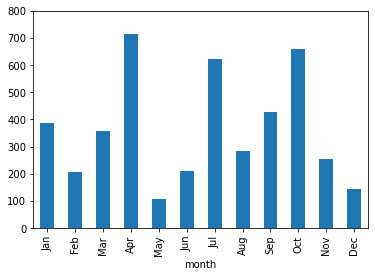

In [53]:
horror_average_profit_percent_monthly = ((genre_analysis_studio_horror.groupby('month')['worldwide_gross'].sum()) / (genre_analysis_studio_horror.groupby('month')['production_budget'].sum())-1)*100
#horror_average_profit_percent_monthly.plot.bar()
df = pd.DataFrame(horror_average_profit_percent_monthly)
df = df.reset_index()
#fig, ax = plt.subplots()
#ax.bar(horror_average_profit_percent_monthly.index, horror_average_profit_percent_monthly.values)
ax = df.set_index("month").loc[month_order].plot(kind="bar", legend=False)
ax.set_ylim(0,800)

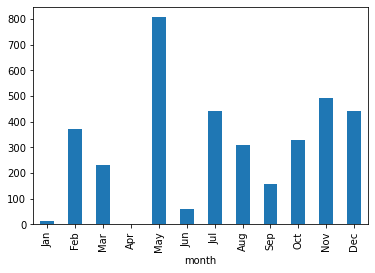

In [54]:
musical_average_profit_percent_monthly = ((genre_analysis_studio_musical.groupby('month')['worldwide_gross'].sum()) / (genre_analysis_studio_musical.groupby('month')['production_budget'].sum())-1)*100
musical_average_profit_percent_monthly['Apr'] = 0
df2 = pd.DataFrame(musical_average_profit_percent_monthly)
df2 = df2.reset_index()
ax = df2.set_index("month").loc[month_order].plot(kind="bar", legend=False)

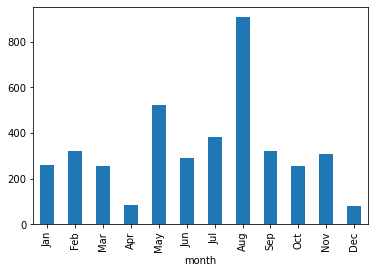

In [55]:
mystery_average_profit_percent_monthly = ((genre_analysis_studio_mystery.groupby('month')['worldwide_gross'].sum()) / (genre_analysis_studio_mystery.groupby('month')['production_budget'].sum())-1)*100
df3 = pd.DataFrame(mystery_average_profit_percent_monthly)
df3 = df3.reset_index()
ax = df3.set_index("month").loc[month_order].plot(kind="bar", legend=False)


## How does a movies success rate change as the budget increases

<AxesSubplot:xlabel='production_budget_m', ylabel='profit_margin_percent'>

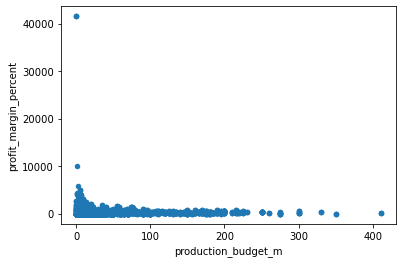

In [56]:
genre_analysis_genre.plot.scatter('production_budget_m','profit_margin_percent')

In [57]:
genre_analysis['budget_group'] = genre_analysis['production_budget'].map(lambda x: (x/1000000)//50)
dict = {0:'0-49', 1:'050-99', 2:'100-149', 3:'150-199', 4:'200-249', 5:'250-299', 6:'300-349', 7:'350-399', 8:'400+'}
genre_analysis['budget_group'] = genre_analysis['budget_group'].map(dict)
genre_analysis.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,budget_group
name_year,,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"[Action, Adventure, Fantasy]",400+
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"[Action, Adventure, Sci-Fi]",350-399
Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"[Action, Adventure, Sci-Fi]",300-349
Avengers: Infinity War 2018,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,582.711400,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]",300-349
Justice League 2017,9,"Nov 17, 2017",Justice League,300000000,229024295,6.559452e+08,118.648403,2017,tt0974015,Justice League,Justice League,2017,120.0,"[Action, Adventure, Fantasy]",300-349


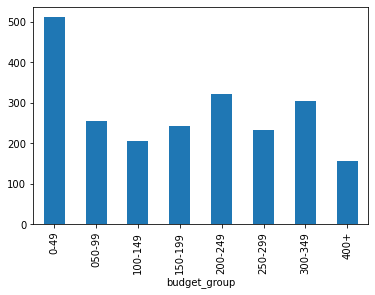

In [66]:
budget_analysis = genre_analysis.groupby('budget_group')['profit_margin_percent'].mean()
budget_analysis.plot.bar();

In [64]:
genre_analysis = genre_analysis[genre_analysis['profit_margin_percent'] > (0)]

<AxesSubplot:xlabel='budget_group'>

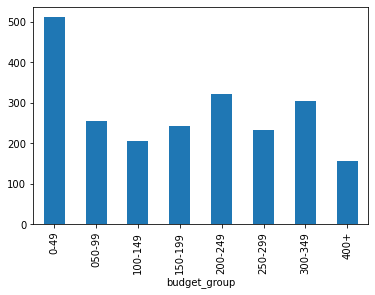

In [65]:
budget_analysis = genre_analysis.groupby('budget_group')['profit_margin_percent'].mean()
budget_analysis.plot.bar()

In [ ]:
#end of Ferit's section

In [ ]:
#Hoang's section pasted, clean up

In [9]:
#Import Data off different dataset. Taken from Kaggle called IMDB 5000 Movie Dataset.
metadeta = pd.read_csv('data/movie_metadata.csv')

In [10]:
#Examine what datamframe to see what it looks like
metadeta.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [11]:
#See if there are any null values and types
metadeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [12]:
#Drop NA values
metadeta = metadeta[metadeta['gross'].notna()]

In [13]:
#Facebook launched around 2004, set dataframe to movie titles that were released after 2004
metadeta = metadeta[metadeta['title_year'] > 2004]

In [14]:
#Double checking to see minimum year
metadeta.min()

C:\Users\01aut\AppData\Local\Temp/ipykernel_17024/1380351631.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadeta.min()


director_name                                                  Aaron Schneider
num_critic_for_reviews                                                     1.0
duration                                                                  41.0
director_facebook_likes                                                    0.0
actor_3_facebook_likes                                                     0.0
actor_1_facebook_likes                                                     0.0
gross                                                                    162.0
genres                                                                  Action
movie_title                                               10 Cloverfield Lane 
num_voted_users                                                             22
cast_total_facebook_likes                                                    0
facenumber_in_poster                                                       0.0
movie_imdb_link              http://www.imdb.com/tit

In [15]:
metadeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 5041
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      2154 non-null   object 
 1   director_name              2156 non-null   object 
 2   num_critic_for_reviews     2154 non-null   float64
 3   duration                   2154 non-null   float64
 4   director_facebook_likes    2156 non-null   float64
 5   actor_3_facebook_likes     2149 non-null   float64
 6   actor_2_name               2152 non-null   object 
 7   actor_1_facebook_likes     2154 non-null   float64
 8   gross                      2156 non-null   float64
 9   genres                     2156 non-null   object 
 10  actor_1_name               2154 non-null   object 
 11  movie_title                2156 non-null   object 
 12  num_voted_users            2156 non-null   int64  
 13  cast_total_facebook_likes  2156 non-null   int64

In [16]:
#checking correlation coefficient between the values
metadeta.corr()["gross"].sort_values()

facenumber_in_poster        -0.024948
aspect_ratio                 0.036908
budget                       0.099176
title_year                   0.119689
director_facebook_likes      0.174836
imdb_score                   0.197884
actor_1_facebook_likes       0.199291
actor_2_facebook_likes       0.299579
cast_total_facebook_likes    0.318170
duration                     0.324626
actor_3_facebook_likes       0.362785
movie_facebook_likes         0.455585
num_critic_for_reviews       0.557206
num_user_for_reviews         0.628843
num_voted_users              0.698520
gross                        1.000000
Name: gross, dtype: float64

In [17]:
#There are alot of categories of facebook likes, lets see what they looked like combined
metadeta['combined_likes_movie'] = metadeta['actor_2_facebook_likes'] + metadeta['actor_1_facebook_likes'] +  metadeta['actor_3_facebook_likes'] + metadeta['director_facebook_likes'] +  metadeta['movie_facebook_likes'] + metadeta['cast_total_facebook_likes'] 

In [18]:
#Lets check the correlation coefficient, we can see that when all facebook likes are combined it produces a strong correlation coefficient
metadeta.corr()["gross"].sort_values()

facenumber_in_poster        -0.024948
aspect_ratio                 0.036908
budget                       0.099176
title_year                   0.119689
director_facebook_likes      0.174836
imdb_score                   0.197884
actor_1_facebook_likes       0.199291
actor_2_facebook_likes       0.299579
cast_total_facebook_likes    0.318170
duration                     0.324626
actor_3_facebook_likes       0.362785
movie_facebook_likes         0.455585
combined_likes_movie         0.465892
num_critic_for_reviews       0.557206
num_user_for_reviews         0.628843
num_voted_users              0.698520
gross                        1.000000
Name: gross, dtype: float64

In [19]:
#Let's break up everything by Genre now, formatting has to be right
metadeta['genres'] = metadeta['genres'].map(lambda x : x.replace("|", " ")) 
metadeta['genres'] = metadeta['genres'].map(lambda x : x.split())

In [20]:
metadeta

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,combined_likes_movie
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,94913.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,108254.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,365759.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,"[Action, Adventure, Sci-Fi]",...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,28150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,Color,Jay Duplass,51.0,85.0,157.0,10.0,Katie Aselton,830.0,192467.0,"[Comedy, Drama, Romance]",...,English,USA,R,15000.0,2005.0,224.0,6.6,NaN,297,2582.0
5023,Color,Daryl Wein,22.0,88.0,38.0,211.0,Heather Burns,331.0,76382.0,[Romance],...,English,USA,NaN,15000.0,2009.0,212.0,6.2,2.35,324,2662.0
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,[Thriller],...,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74,74.0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,"[Comedy, Drama]",...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,1737.0


In [21]:
#Explode will let us split them up
metadeta = metadeta.explode('genres')

In [24]:
metadeta

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,combined_likes_movie
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Adventure,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Fantasy,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,94913.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy,...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,1737.0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Drama,...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,1737.0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy,...,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,5200.0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Drama,...,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,5200.0


In [26]:
#There are two seperate Music and Musical genre. They are similar enough to condense into one column.
metadeta['genres'] = metadeta['genres'].map(lambda x: "Musical" if x == "Music" else x)

In [27]:
#Setting up plot legend and labels for better data visualization
metadeta.rename(columns={'genres': 'Genres'}, inplace = True)
metadeta['gross_adjusted'] = metadeta['gross'] / 1000000
metadeta['combined_likes_movie_adjusted'] = metadeta['combined_likes_movie'] / 1000

C:\Users\01aut\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


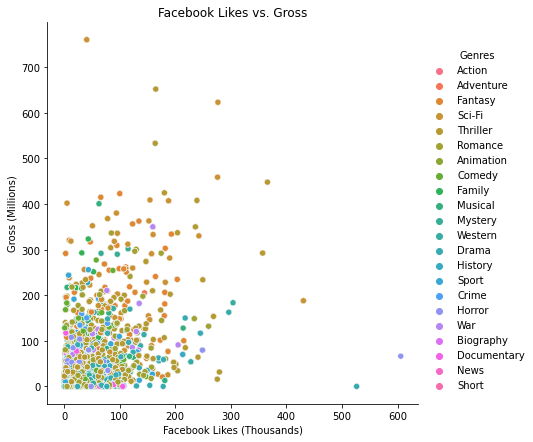

In [29]:
#Plotting with SNS by genre
sns.pairplot(x_vars= ['combined_likes_movie_adjusted'], y_vars=["gross_adjusted"], data= metadeta, 
hue="Genres", size=6)

plt.title('Facebook Likes vs. Gross')
plt.xlabel('Facebook Likes (Thousands)')
plt.ylabel('Gross (Millions)');



In [30]:
#Lets now only look at the 3 genres we are interested in
metadeta_top3 = metadeta[(metadeta['Genres'] == 'Horror') | (metadeta['Genres'] == 'Mystery') | (metadeta['Genres'] == 'Musical')]

C:\Users\01aut\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


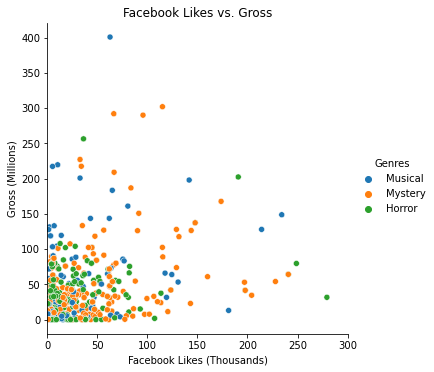

In [31]:
#Plotting the only 3 genres, limited x to 300 to get a good grasp without outliers
sns.pairplot(x_vars= ['combined_likes_movie_adjusted'], y_vars=["gross_adjusted"], data= metadeta_top3, 
hue="Genres", size=5)

plt.title('Facebook Likes vs. Gross')
plt.xlabel('Facebook Likes (Thousands)')
plt.ylabel('Gross (Millions)')
plt.xlim(0, 300);

In [32]:
#Checking the correlation between gross and combined likes movies under genres
metadeta.groupby('Genres')[["combined_likes_movie", "gross"]].corr()["gross"].loc[:,"combined_likes_movie"].sort_values()

Genres
Documentary    0.079296
Sport          0.205754
Horror         0.274817
Mystery        0.317863
Musical        0.321736
Animation      0.323789
Comedy         0.334132
Crime          0.431754
Romance        0.440537
Biography      0.463471
Drama          0.466650
Family         0.477682
Fantasy        0.487128
Action         0.487605
Adventure      0.526538
Thriller       0.536642
Sci-Fi         0.543116
History        0.629724
War            0.684955
Western        0.829149
News                NaN
Short               NaN
Name: gross, dtype: float64

In [33]:
#Checking the movie likes in each genre
metadeta.groupby('Genres').sum().loc[:,"combined_likes_movie"].sort_values( ascending = False)

Genres
Drama          42565102.0
Action         27662055.0
Thriller       26982409.0
Adventure      25829685.0
Comedy         24846521.0
Sci-Fi         16157498.0
Romance        16051586.0
Fantasy        14956100.0
Crime          14190906.0
Family          9894327.0
Mystery         8965901.0
Biography       6983713.0
Horror          6670355.0
Animation       4661824.0
Musical         3553761.0
History         3212747.0
War             2990686.0
Sport           2589418.0
Western         1553688.0
Documentary      570876.0
News              15318.0
Short                 0.0
Name: combined_likes_movie, dtype: float64